In [1]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

import pickle

In [127]:
# 目标变量
target_var = 'Attrition'

# 连续变量
num_col = ['Age', 'MonthlyIncome', 'TotalWorkingYears','PercentSalaryHike',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
           'YearsWithCurrManager', 'NumCompaniesWorked']
# 有序变量
ord_col = ['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
           'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
           'StockOptionLevel', 'WorkLifeBalance', 'TrainingTimesLastYear']

# 分类变量
cat_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
           'MaritalStatus', 'OverTime']

In [128]:
train = pd.read_csv('pfm_train.csv', header=0)
test = pd.read_csv('pfm_test.csv', header=0)

In [129]:
# def averageyears(years):
#     x, y = years
#     if y == 0:
#         return x
#     else:
#         return x/y

# train['AverageHike'] = train[['PercentSalaryHike','YearsAtCompany']].apply(averageyears, axis=1)
# num_col = ['Age', 'MonthlyIncome', 'TotalWorkingYears','PercentSalaryHike',
#            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
#            'YearsWithCurrManager', 'NumCompaniesWorked', 'AverageHike']
train[num_col] = train[num_col].apply(lambda x: np.log1p(x))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[num_col] = scaler.fit_transform(train[num_col])

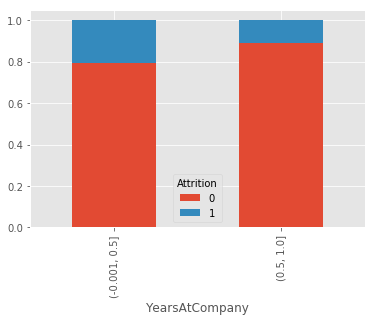

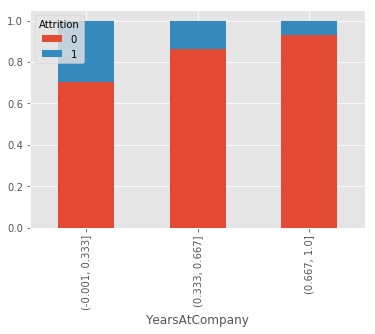

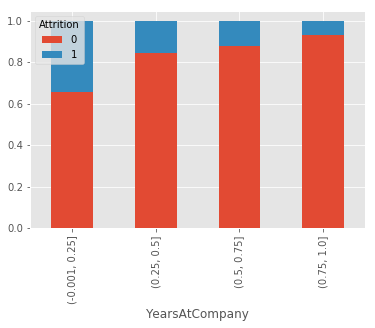

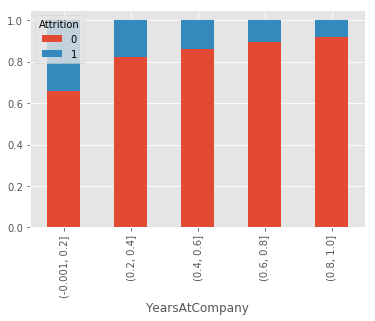

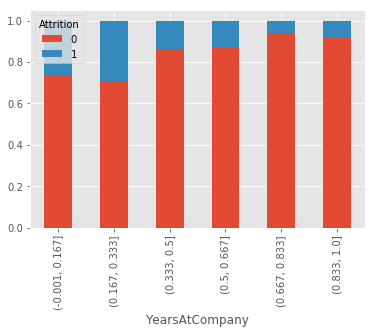

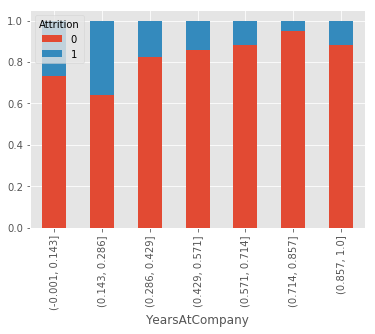

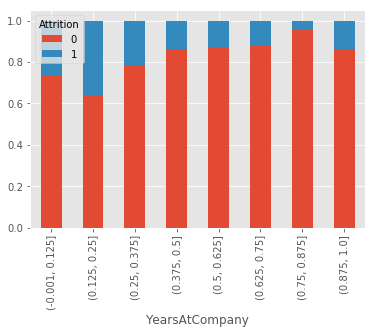

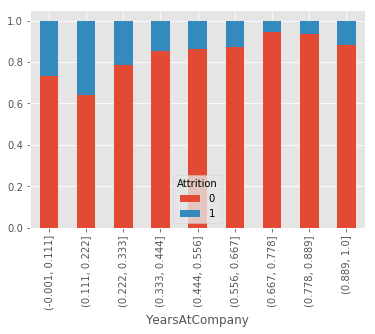

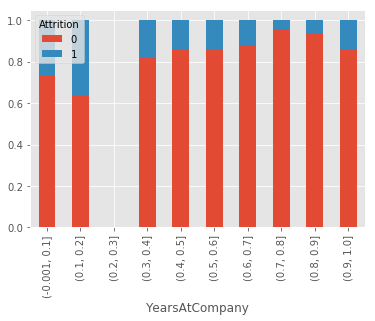

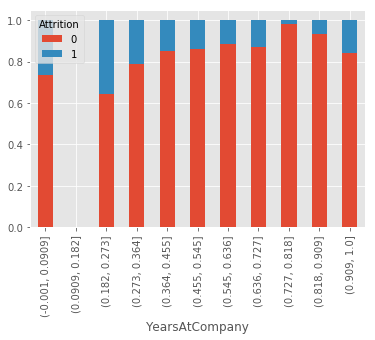

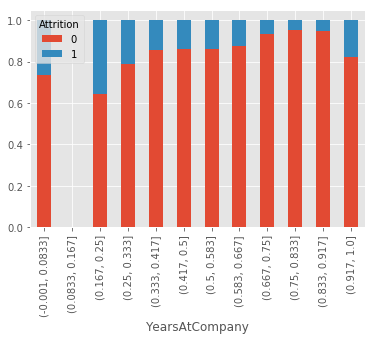

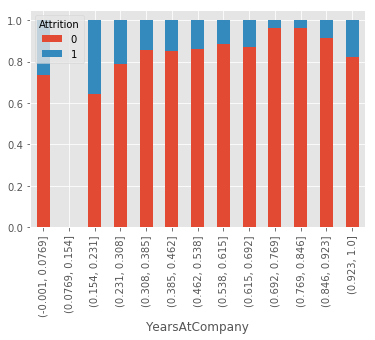

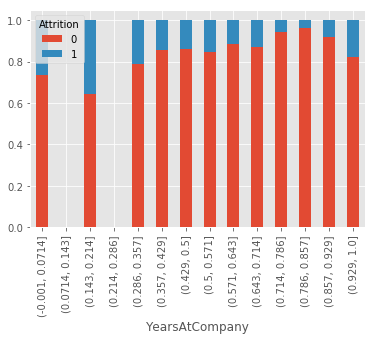

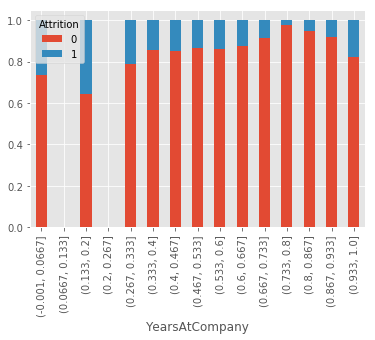

In [51]:
for bins in range(2, 16):
    factor = pd.cut(bins=bins, x=train['YearsAtCompany'])
    #print(train.groupby(factor)['Attrition'].mean())
    #print()
    table = pd.crosstab(factor, train['Attrition'])
    table.div(table.sum(axis=1), axis=0).plot(kind='bar', stacked=True)

In [130]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for col in num_col:
    train[col] = pd.cut(bins=5, x=train[col])
    train[col] = label_enc.fit_transform(train[col])
    #print(train.groupby(factor)['Attrition'].mean())

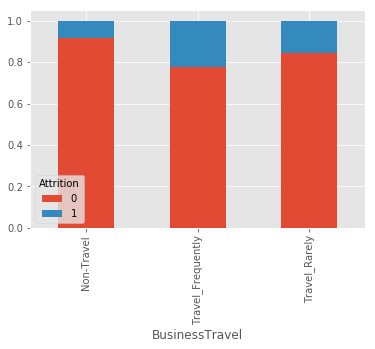

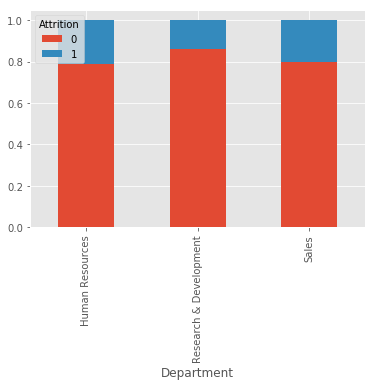

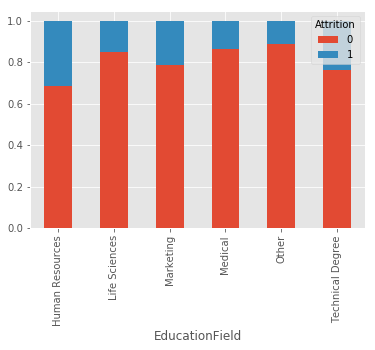

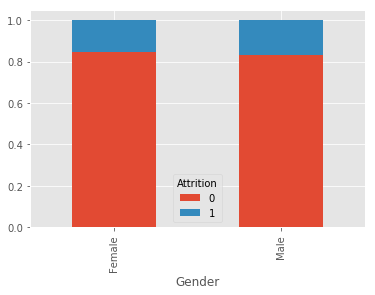

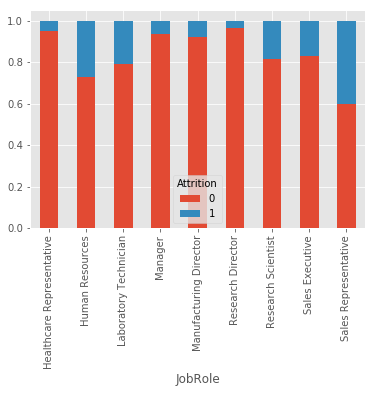

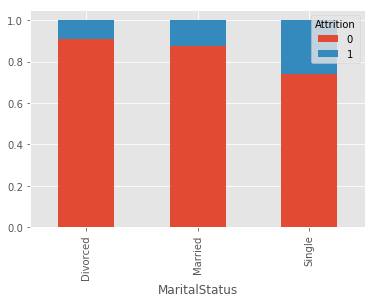

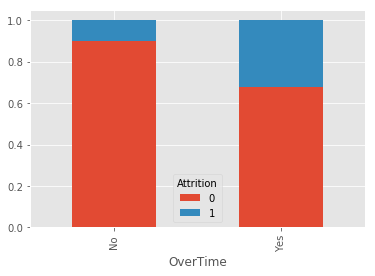

In [32]:
for col in cat_col:
    _ = plt.figure()
    table=pd.crosstab(train[col], train['Attrition'])
    table.div(table.sum(1), axis=0).plot(kind='bar', stacked=True)

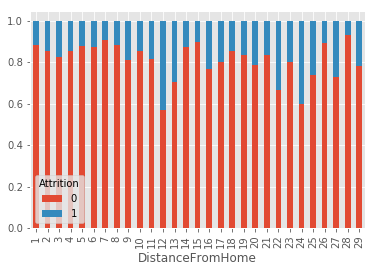

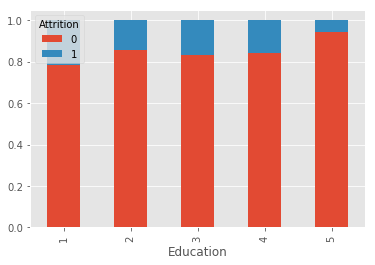

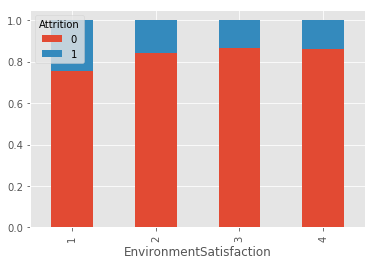

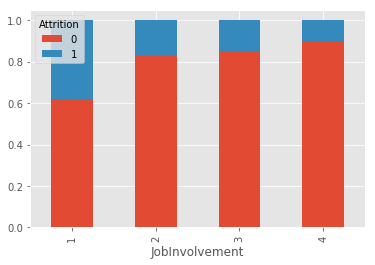

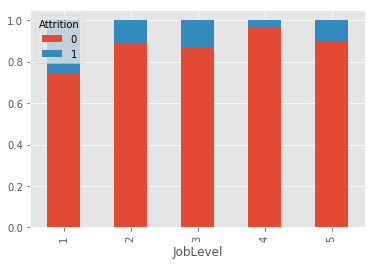

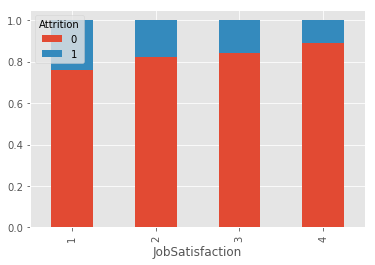

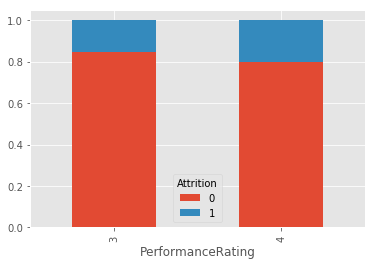

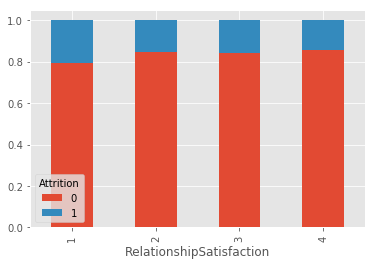

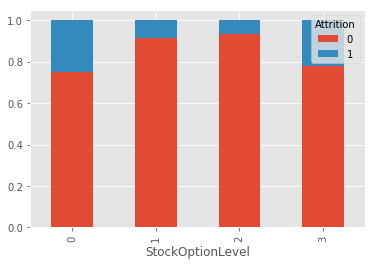

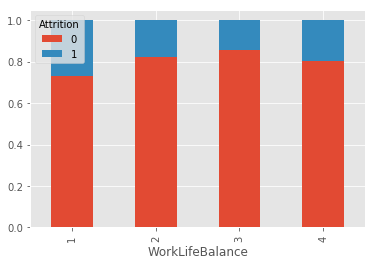

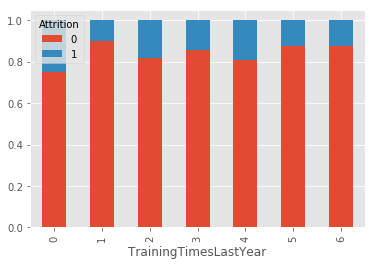

In [33]:
for col in ord_col:
    _ = plt.figure()
    table=pd.crosstab(train[col], train['Attrition'])
    table.div(table.sum(1), axis=0).plot(kind='bar', stacked=True)

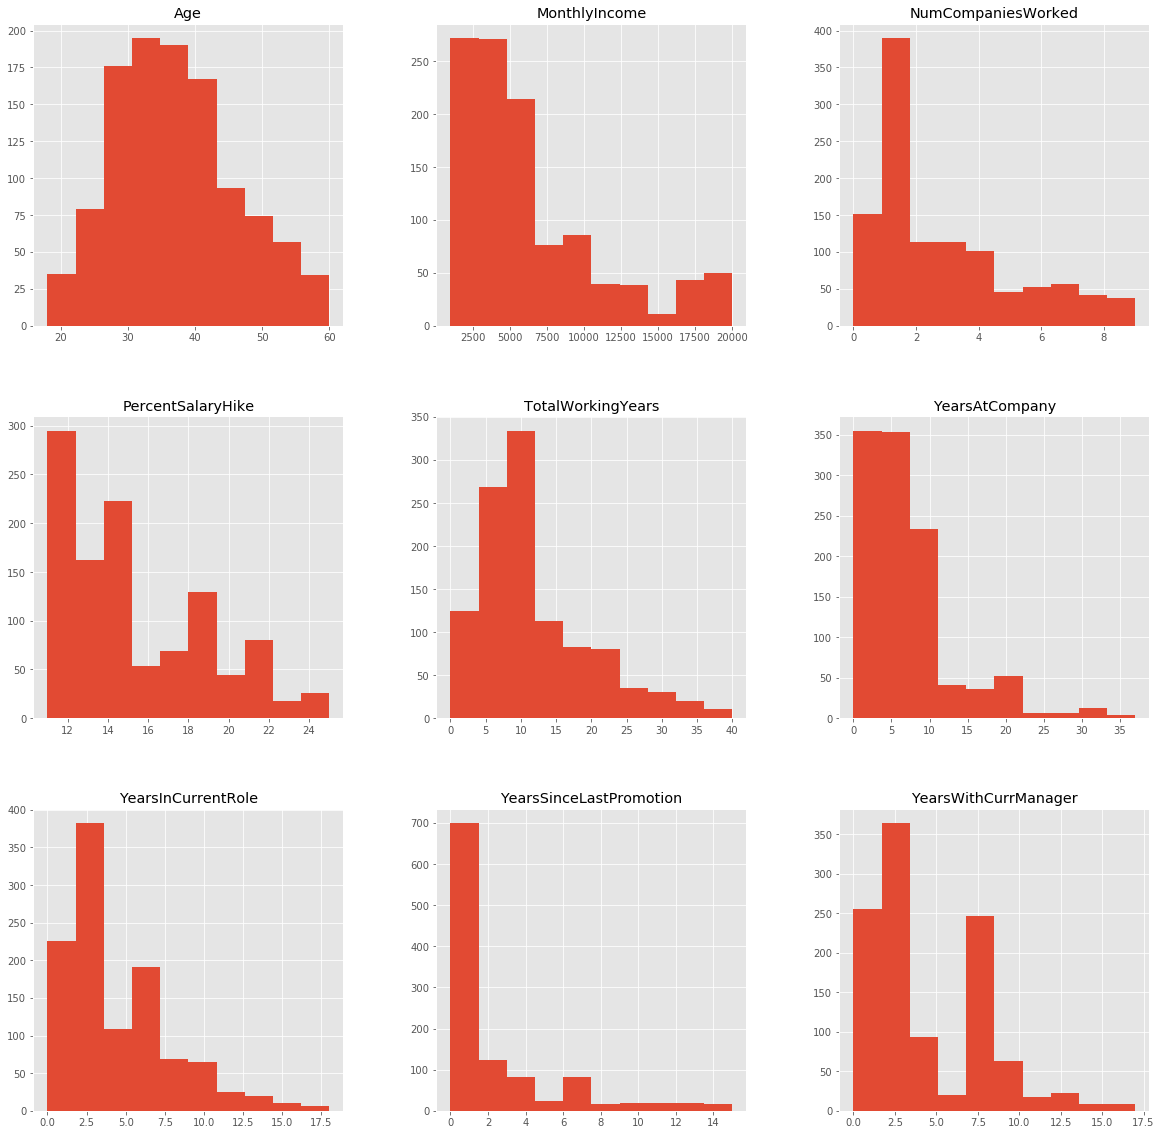

In [38]:
_ = train[num_col].hist(bins=10, figsize=(20,20))

In [131]:
for var in cat_col:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train1=train.join(cat_list)
    train=train1
    train.drop([var], axis=1, inplace=True)
    
    cat_list = pd.get_dummies(test[var], prefix=var)
    test1=test.join(cat_list)
    test=test1
    test.drop([var], axis=1, inplace=True)

In [132]:
for var in num_col:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train1=train.join(cat_list)
    train=train1
    train.drop([var], axis=1, inplace=True)
    
    cat_list = pd.get_dummies(test[var], prefix=var)
    test1=test.join(cat_list)
    test=test1
    test.drop([var], axis=1, inplace=True)

In [133]:
for var in ord_col:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train1=train.join(cat_list)
    train=train1
    train.drop([var], axis=1, inplace=True)
    
    cat_list = pd.get_dummies(test[var], prefix=var)
    test1=test.join(cat_list)
    test=test1
    test.drop([var], axis=1, inplace=True)

In [134]:
y = train['Attrition']
X = train.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'Age_3','MonthlyIncome_4', 'Age_0'], axis=1)
cols = [x for x in X.columns if x != 'Attrition']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size=0.3, random_state=0)

In [136]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=45)
for i in range(1, len(cols)+1):
    rfe = RFE(model, i)
    new = rfe.fit_transform(X_train, y_train)
    model.fit(new, y_train)
    train_score = model.score(new, y_train)
    new_test = rfe.transform(X_test)
    score = model.score(new_test, y_test)
    print('{}, train:{:.3f}, test={:.3f}'.format(i,train_score,score))
#rfe_result = pd.DataFrame({'support':rfe.support_, 'ranking':rfe.ranking_, 'cols': cols})

1, train:0.831, test=0.855
2, train:0.834, test=0.858
3, train:0.836, test=0.861
4, train:0.835, test=0.873
5, train:0.835, test=0.876
6, train:0.844, test=0.885
7, train:0.845, test=0.882
8, train:0.851, test=0.876
9, train:0.856, test=0.879
10, train:0.853, test=0.882
11, train:0.862, test=0.879
12, train:0.870, test=0.882
13, train:0.873, test=0.888
14, train:0.866, test=0.885
15, train:0.869, test=0.888
16, train:0.869, test=0.888
17, train:0.874, test=0.882
18, train:0.869, test=0.885
19, train:0.870, test=0.885
20, train:0.868, test=0.885
21, train:0.879, test=0.894
22, train:0.879, test=0.897
23, train:0.878, test=0.894
24, train:0.879, test=0.900
25, train:0.886, test=0.894
26, train:0.886, test=0.894
27, train:0.892, test=0.903
28, train:0.891, test=0.903
29, train:0.897, test=0.903
30, train:0.897, test=0.900
31, train:0.897, test=0.903
32, train:0.899, test=0.897
33, train:0.899, test=0.897
34, train:0.899, test=0.897
35, train:0.899, test=0.897
36, train:0.900, test=0.891
3

In [137]:
rfe = RFE(model, 36)
rfe.fit(X_train, y_train)
rfe_result = pd.DataFrame({'support':rfe.support_, 'ranking':rfe.ranking_, 'cols': cols})

In [138]:
rfe_result.sort_values(by='ranking')

,cols,ranking,support
0,BusinessTravel_Non-Travel,1,True
104,EnvironmentSatisfaction_1,1,True
96,DistanceFromHome_27,1,True
93,DistanceFromHome_24,1,True
91,DistanceFromHome_22,1,True
89,DistanceFromHome_20,1,True
85,DistanceFromHome_16,1,True
26,OverTime_No,1,True
27,OverTime_Yes,1,True
82,DistanceFromHome_13,1,True


In [139]:
useful_col = rfe_result.loc[rfe_result['ranking']==1, 'cols'].tolist()

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(random_state=32, penalty='l2', C=.1)
logreg.fit(X_train[useful_col], y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=32, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test[useful_col]))))

Logistic regression accuracy: 0.903


In [142]:
pred = logreg.predict(test[useful_col]).astype(int)
result = pd.DataFrame({'result': pred})
result.to_csv('../result/result.csv', index=False)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train[useful_col], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test[useful_col]))))

Random Forest Accuracy: 0.864


In [65]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train[useful_col], y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test[useful_col]))))

Support vector machine accuracy: 0.855


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test[useful_col])))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       282
          1       0.74      0.54      0.63        48

avg / total       0.90      0.91      0.90       330



In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=logreg.predict(X_test[useful_col]))

array([[273,   9],
       [ 22,  26]], dtype=int64)